In [1]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
cd yolov5

C:\Users\jainh\OneDrive\Desktop\yolov5


C:\Program Files\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [12]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\jainh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-9 Python-3.11.5 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [13]:
img = 'https://media.wired.com/photos/593256b42a990b06268a9e21/master/w_1920,c_limit/traffic-jam-getty.jpg'

In [14]:
results = model(img)
results.print()

image 1/1: 684x1025 61 cars
Speed: 2478.6ms pre-process, 184.2ms inference, 5.7ms NMS per image at shape (1, 3, 448, 640)


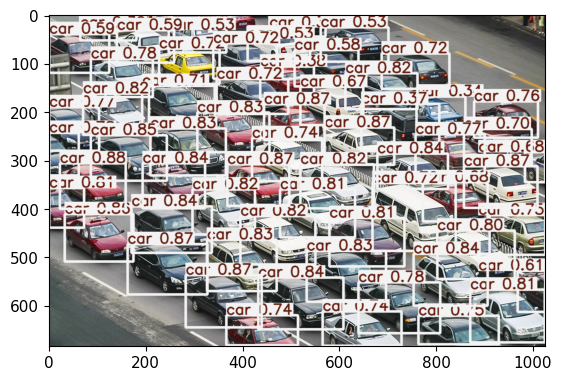

In [15]:
%matplotlib inline
plt.imshow(np.squeeze(results.render())) 
plt.show()

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  #make detections
  results = model(frame)

  cv2.imshow('Yolo', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [16]:
import uuid
import time
import os

In [17]:
cd ..

C:\Users\jainh\OneDrive\Desktop


In [18]:
print(os.getcwd())

C:\Users\jainh\OneDrive\Desktop


In [19]:
IMAGE_PATH_before_abs = os.path.join('data', 'images')
IMAGE_PATH = os.path.abspath(IMAGE_PATH_before_abs)
labels = ['awake', 'drowsey']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)
    
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [20]:
print(os.getcwd())

C:\Users\jainh\OneDrive\Desktop


In [21]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [63]:
!pip install pyqt5 lxml --upgrade

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
cd labelImg

C:\Users\jainh\OneDrive\Desktop\labelImg


In [23]:
!C:\Users\jainh\AppData\Roaming\Python\Python311\Scripts\pyrcc5.exe -o libs/resources.py resources.qrc

In [24]:
print(os.getcwd())

C:\Users\jainh\OneDrive\Desktop\labelImg


In [27]:
cd C:\Users\jainh\OneDrive\Desktop

C:\Users\jainh\OneDrive\Desktop


In [26]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

The system cannot find the path specified.


In [29]:
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', source='local')

YOLOv5  2024-9-9 Python-3.11.5 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [42]:
img = "D:/Drive/Ajmer/IMG_20221223_082207.jpg"

In [43]:
results = model(img)

In [44]:
results.print()

image 1/1: 4624x3472 1 awake
Speed: 269.4ms pre-process, 193.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 480)


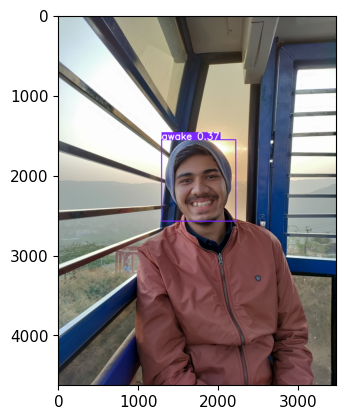

In [45]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [53]:
img2 = "D:/Drive/Manali/IMG_20230516_122513.jpg"

In [54]:
results = model(img2)

In [55]:
results.print()

image 1/1: 3456x4608 (no detections)
Speed: 255.2ms pre-process, 191.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [35]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  #make detections
  results = model(frame)

  cv2.imshow('Yolo', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()